## **EDA :** Initiation with Stroke Prediction

#### _Stroke Prediction Dataset_

🟠 `on work`

---

* **Objectifs**
    * Découvrir l'analyse exploratoire de données
    * Prendre en main `NumPy`, `Pandas`, `Matplotlib`, `Seaborn`

1. **Identification générale**
    * Structure
    * Valeurs cibles
    * Types de valeurs
    * Valeurs manquantes ou défectueuses
    * Préparation
2. **Analyse univariée**
    * Cible
    * Variables quantitatives continues
    * Variables qualitatives
3. **Analyse bivariée**
    * Variables quantitatives continues
    * Variables quantitatives discrètes
    * Variables qualitatives
    * Liens correlation
4. **Finalisation**
    * Conclusion
    * Traitements

**Built-in**

**Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import pingouin as pg

**User functions**

**Notebook setup**

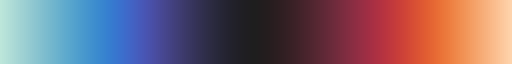

In [10]:
# Colour codes
mean_c = '#FFFFFF'
median_c = '#c2e800'
default_c = '#669999'
stroke_c = [
    '#e60073', # Yes
    '#b8e600' # No
]
categ_c = [
    '#e60073', # Yes
    '#b8e600' # No
]

# Pandas
pd.options.display.max_rows = 30
pd.options.display.min_rows = 6

# Matplotlib
plt.style.use('dark_background')

plt.rcParams['figure.facecolor'] = '#242428'
plt.rcParams['axes.facecolor'] = '#242428'
plt.rcParams['axes.titleweight'] = 'bold'

# Seaborn : display icefire, crest, mako, rocket, ...
sns.color_palette("icefire", as_cmap=True)

**Stroke Prediction dataset**

[Stroke Prediction dataset on Kaggle by fedesoriano](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)

In [4]:
stroke_file_path = '../_datasets/stroke_data.csv'
stroke_data = pd.read_csv(stroke_file_path)

stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


---
### **1.** Identification générale

##### **1.1** - Structure

In [5]:
# (!) - 5110 entries dispatched in 12 columns
stroke_data.shape

(5110, 12)

In [7]:
# (!) - Data and almost complete with multiple types
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


##### **1.2** - Valeurs cibles

In [8]:
# (!) - Target is 'stroke' as categorical : Yes = 1 / No = 0
stroke_data['stroke'].unique()

array([1, 0], dtype=int64)

##### **1.3** - Types de valeurs

In [9]:
# (!) - 3 types as objects, floating point numbers and integers
stroke_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
# (!) - 5 columns objects, 7 numerics
stroke_data.dtypes.value_counts()

object     5
int64      4
float64    3
dtype: int64

In [13]:
# (!) - Max values in float : large amount possibilities
display(stroke_data.select_dtypes(np.float64).max())

# (!) - Max values in integers : 'hypertension', 'heart_disease' (and 'stroke') are very small values
stroke_data.select_dtypes(np.int64).max()

age                   82.00
avg_glucose_level    271.74
bmi                   97.60
dtype: float64

id               72940
hypertension         1
heart_disease        1
stroke               1
dtype: int64

In [18]:
# (!) - 'hypertension', 'heart_disease' are also categorical : Yes = 1 / No = 0
display(stroke_data['hypertension'].unique())
stroke_data['heart_disease'].unique()

array([0, 1], dtype=int64)

array([1, 0], dtype=int64)

In [15]:
# (!) - Object columns are nominal qualitative variables : and 'ever_married' ?
stroke_data.select_dtypes('object')

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
...,...,...,...,...,...
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked
5109,Female,Yes,Govt_job,Urban,Unknown


In [19]:
# (!) - 'ever_maried' is also categorical : Yes = 1 / No = 0
stroke_data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

##### **1.4** - Valeurs manquantes ou défectueuses

In [20]:
# (!) - 201 nulls in 'bmi'
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

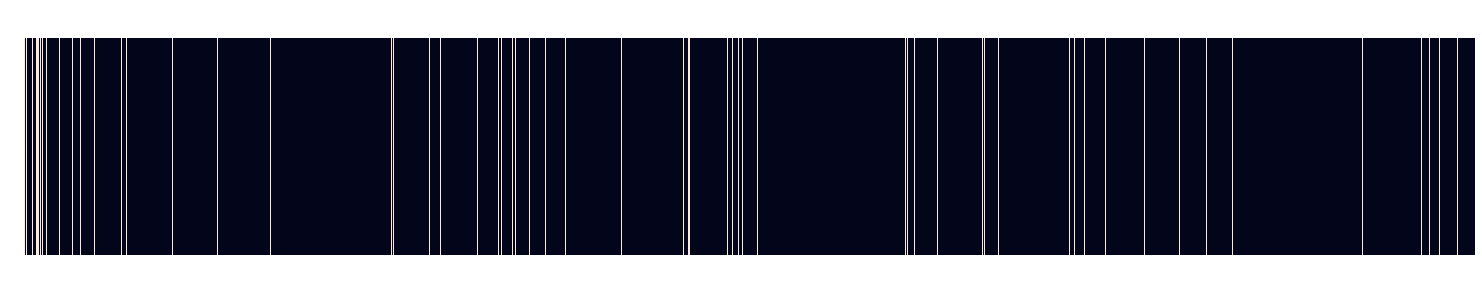

"Null's are 3.933 % of bmi data"

In [55]:
# (!) - Most of Nulls are in first indexes of bmi
bmi = pd.DataFrame([stroke_data['bmi']])
percent = (stroke_data['bmi'].isnull().sum() / stroke_data.shape[0]) * 100

plt.figure(figsize=(26, 4))
plt.title("Valeurs manquantes dans 'bmi'\n")
sns.heatmap(bmi.isnull(), cbar=False)
plt.show()

f"Null's are {percent:.3f} % of bmi data"

In [244]:
# (!) - 
stroke_data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

##### **1.5** - Préparation

* faciliter la manipulation et la **visualisation**
* explorer les possibilités `NumPy` et `Pandas`

In [5]:
# Rename cols
columns = {
    'Residence_type': 'residence_type'
}

# Rename categories
factors = {
    0: 'No',
    1: 'Yes'
}

# Apply
stroke_data = stroke_data.rename(columns=columns)
stroke_data['hypertension'] = stroke_data['hypertension'].map(factors)
stroke_data['heart_disease'] = stroke_data['heart_disease'].map(factors)
stroke_data['stroke'] = stroke_data['stroke'].map(factors)

stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
5107,19723,Female,35.0,No,No,Yes,Self-employed,Rural,82.99,30.6,never smoked,No
5108,37544,Male,51.0,No,No,Yes,Private,Rural,166.29,25.6,formerly smoked,No
5109,44679,Female,44.0,No,No,Yes,Govt_job,Urban,85.28,26.2,Unknown,No


In [56]:
# (!) - Continuous variable are the only numerics
stroke_data.dtypes.value_counts()

object     8
float64    3
int64      1
dtype: int64

In [8]:
# (!) - Extract continous list
continous = stroke_data.select_dtypes(np.float64).columns.to_list()

# (!) - Extract categoricals list except target 'stroke'
categoricals = stroke_data.select_dtypes('object').columns.to_list()
categoricals.remove('stroke')

display(continous)
categoricals

['age', 'avg_glucose_level', 'bmi']

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'residence_type',
 'smoking_status']

---
### **2.** Analyse univariée

##### **2.1** - Cible

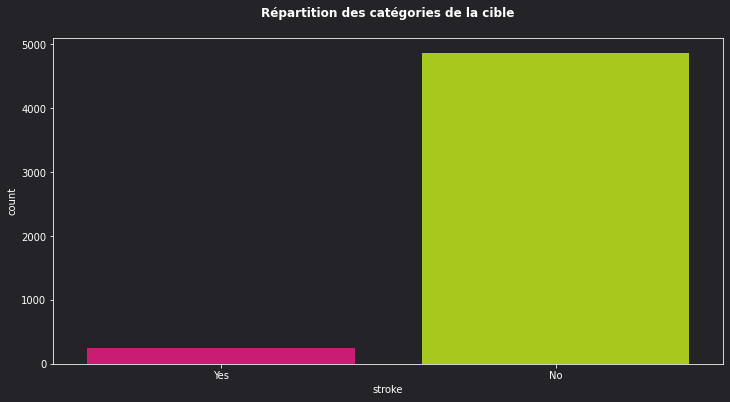

"It's 249 people with stroke on 5110 :: So 4.873 % of data"

In [85]:
# (!) - Very balanced dataset
yes_count = stroke_data.loc[stroke_data['stroke'] == 'Yes', 'stroke'].value_counts()
yes_percent = (yes_count[0] / stroke_data.shape[0]) * 100

plt.figure(figsize=(12,6))
plt.title("Répartition des catégories de la cible\n")
sns.countplot(data=stroke_data, x='stroke', palette=stroke_c)
plt.show()

f"It's {yes_count[0]} people with stroke on {stroke_data.shape[0]} :: So {yes_percent:.3f} % of data"

##### **2.2** - Variables quantitatives continues

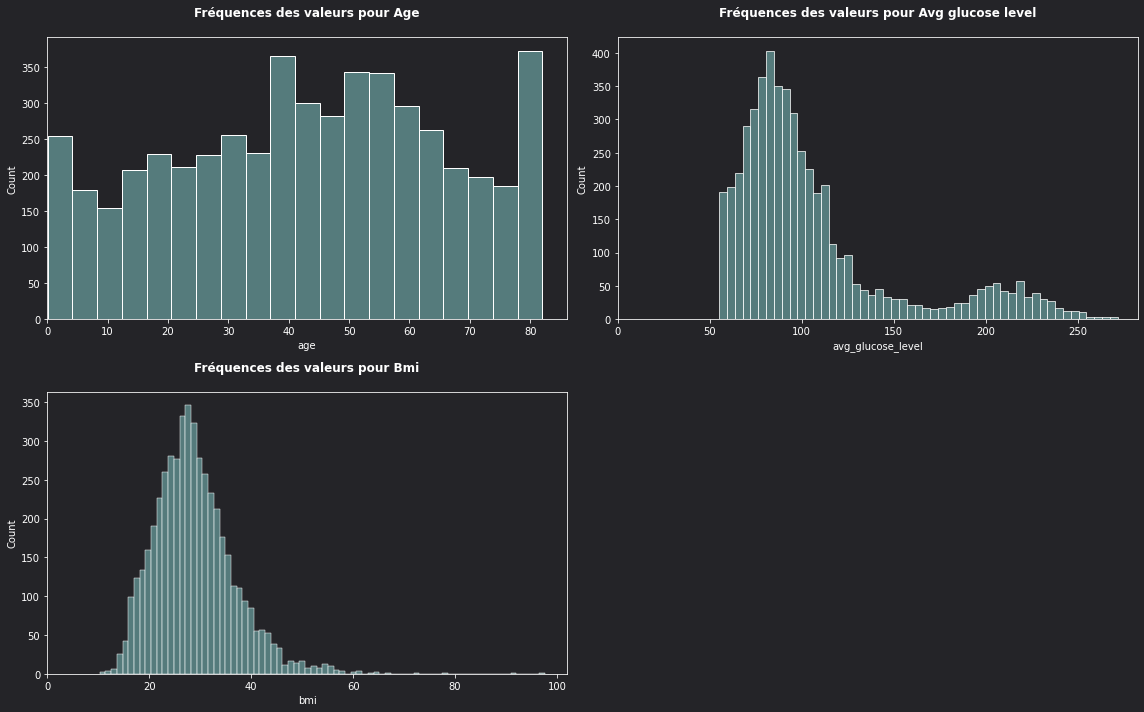

In [66]:
# (!) - 
plt.figure(figsize=(16, 10), layout='tight')
for i, col in enumerate(continous) :
    plt.subplot(2, 2, i+1)
    plt.title(f"Fréquences des valeurs pour {col.replace('_', ' ').capitalize()}\n")
    sns.histplot(data=stroke_data, x=col, fill=True, color=default_c)
    plt.xlim(0)
plt.show()

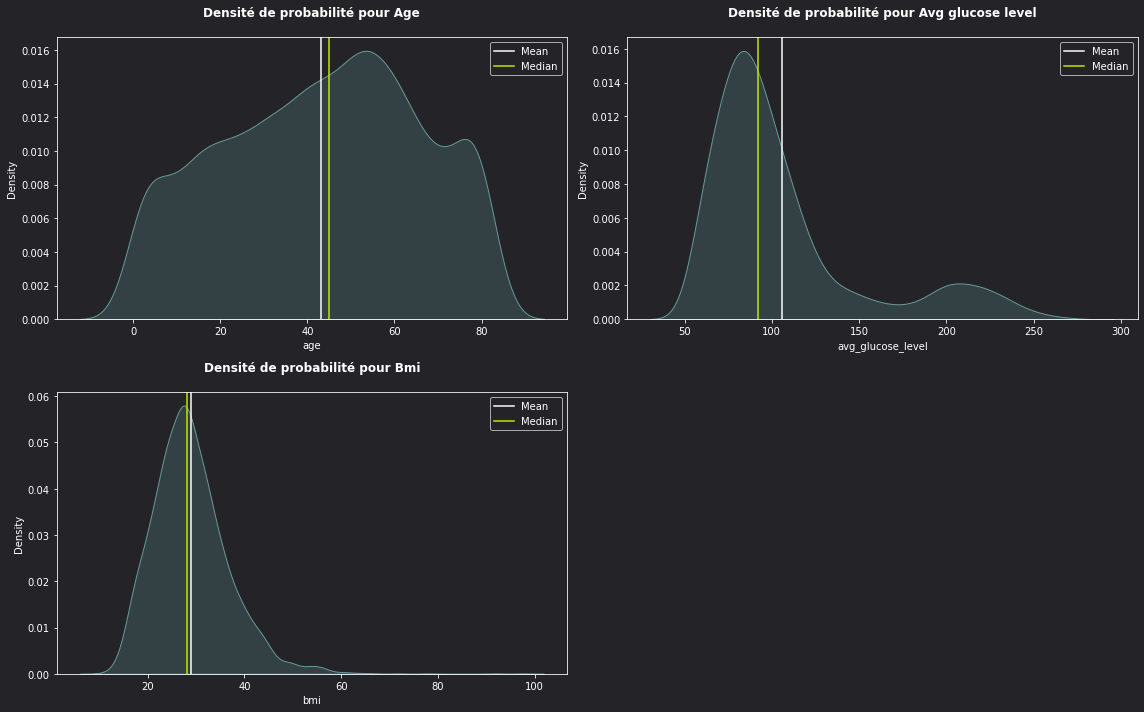

,age,avg_glucose_level,bmi
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
max,82.000000,271.740000,97.600000


In [87]:
# (!) - 
plt.figure(figsize=(16, 10), layout='tight')
for i, col in enumerate(continous) :
    plt.subplot(2, 2, i+1)
    plt.title(f"Densité de probabilité pour {col.replace('_', ' ').capitalize()}\n")
    sns.kdeplot(data=stroke_data, x=col, fill=True, color=default_c)
    plt.axvline(stroke_data[col].mean(), c=mean_c, label='Mean')
    plt.axvline(stroke_data[col].median(), c=median_c, label="Median")
    plt.legend()
plt.show()

stroke_data[continous].describe().iloc[[1, 2, 3, 7]]

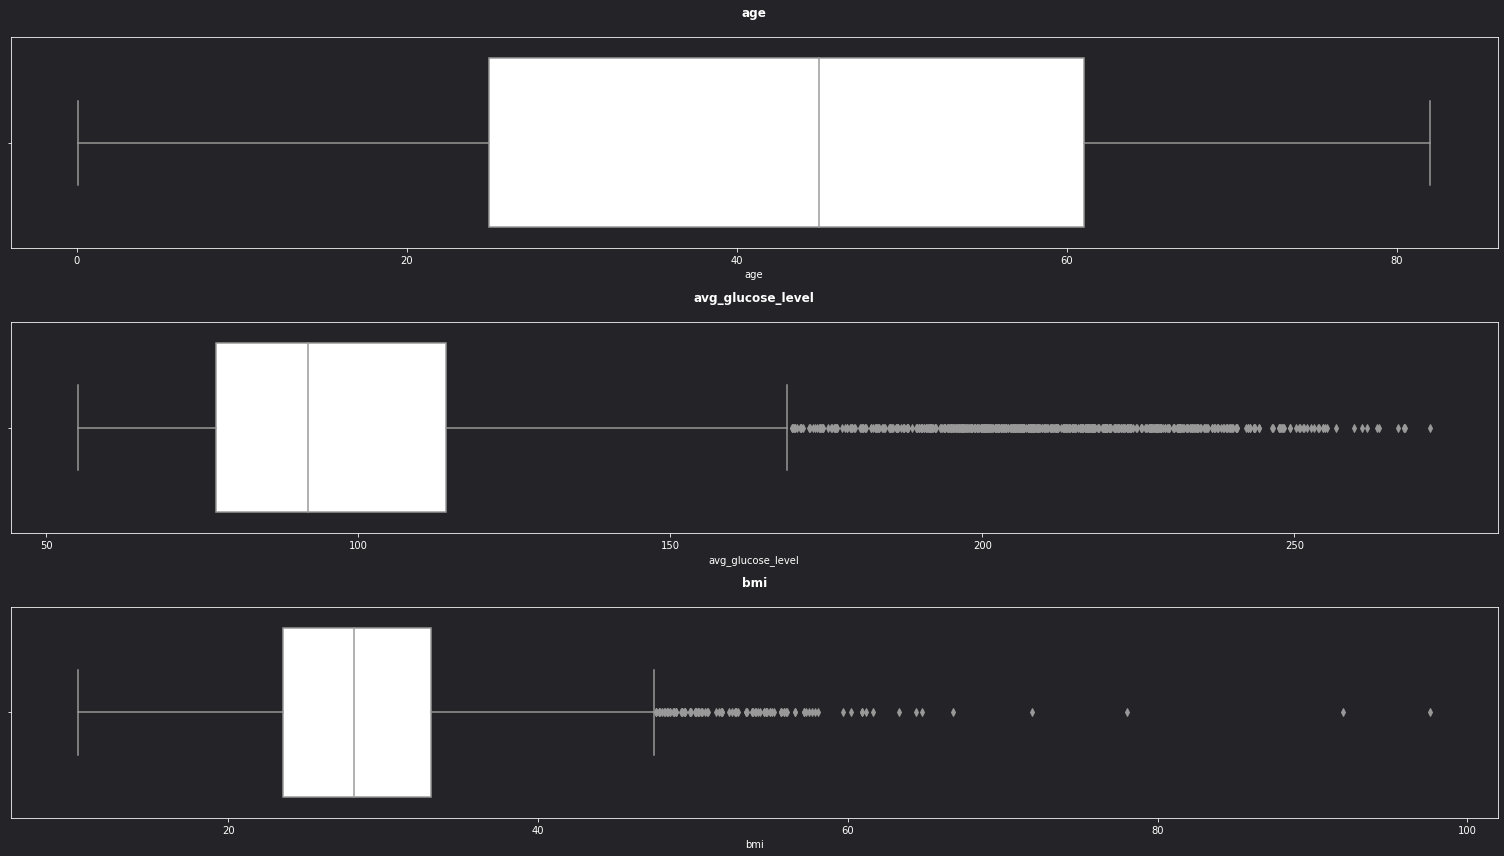

In [111]:
# (!) - Large quantity of high outilers in 'avg_glucose_level' and 'bmi'
plt.figure(figsize=(21, 12), layout='tight')
for i, col in enumerate(continous) :
    plt.subplot(3, 1, i+1)
    plt.title(f"{col}\n")
    sns.boxplot(data=stroke_data, x=col, color='#FFFFFF')
plt.show()

In [121]:
# Isolation of entries with outlied 'glucose level' and 'bmi
q25 = stroke_data[['avg_glucose_level', 'bmi']].quantile(.25)
q75 = stroke_data[['avg_glucose_level', 'bmi']].quantile(.75)
iqr = q75 - q25
uppers = q75 + (1.5 * iqr)

uppers

avg_glucose_level    169.3575
bmi                   47.5000
dtype: float64

In [119]:
# (!) - 627 people with high 'avg_glucose_level', most of them has no stroke
print(f"'avg_glucose_level' supérieurs à {uppers['avg_glucose_level']:.3f}")
avg_glucose_outliers = stroke_data.loc[stroke_data['avg_glucose_level'] > uppers['avg_glucose_level']].sort_values('avg_glucose_level')

avg_glucose_outliers.describe(exclude=[np.int64]) # excl. 'id'

'avg_glucose_level' supérieurs à 169.358


,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,627,627.000000,627,627,627,627,627,627.000000,566.000000,627,627
unique,2,NaN,2,2,2,4,2,NaN,NaN,4,2
top,Female,NaN,No,No,Yes,Private,Urban,NaN,NaN,never smoked,No
freq,329,NaN,465,524,552,372,322,NaN,NaN,259,543
mean,NaN,59.959553,NaN,NaN,NaN,NaN,NaN,211.341595,33.353180,NaN,NaN
std,NaN,16.257800,NaN,NaN,NaN,NaN,NaN,20.825706,7.930821,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,169.430000,14.200000,NaN,NaN
25%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,196.760000,27.700000,NaN,NaN
50%,NaN,62.000000,NaN,NaN,NaN,NaN,NaN,210.000000,32.100000,NaN,NaN
75%,NaN,72.500000,NaN,NaN,NaN,NaN,NaN,226.715000,37.575000,NaN,NaN


In [120]:
# (!) - 110 people with high 'bmi', most of them has no stroke
print(f"'bmi' supérieurs à {uppers['bmi']:.3f}")
bmi_outliers = stroke_data.loc[stroke_data['bmi'] > uppers['bmi']].sort_values('bmi')

bmi_outliers.describe(exclude=[np.int64]) # excl. 'id'

'bmi' supérieurs à 47.500


,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,110,110.000000,110,110,110,110,110,110.000000,110.000000,110,110
unique,2,NaN,2,2,2,3,2,NaN,NaN,4,2
top,Female,NaN,No,No,Yes,Private,Rural,NaN,NaN,never smoked,No
freq,85,NaN,89,109,85,77,61,NaN,NaN,48,108
mean,NaN,44.463636,NaN,NaN,NaN,NaN,NaN,119.972364,54.181818,NaN,NaN
std,NaN,13.210836,NaN,NaN,NaN,NaN,NaN,57.169152,7.565302,NaN,NaN
min,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,56.630000,47.600000,NaN,NaN
25%,NaN,35.500000,NaN,NaN,NaN,NaN,NaN,79.225000,49.800000,NaN,NaN
50%,NaN,46.000000,NaN,NaN,NaN,NaN,NaN,96.050000,52.750000,NaN,NaN
75%,NaN,53.000000,NaN,NaN,NaN,NaN,NaN,169.575000,55.700000,NaN,NaN


##### **2.3** - ~~Variables quantitatives discrètes~~

##### **2.4** - Variables qualitatives

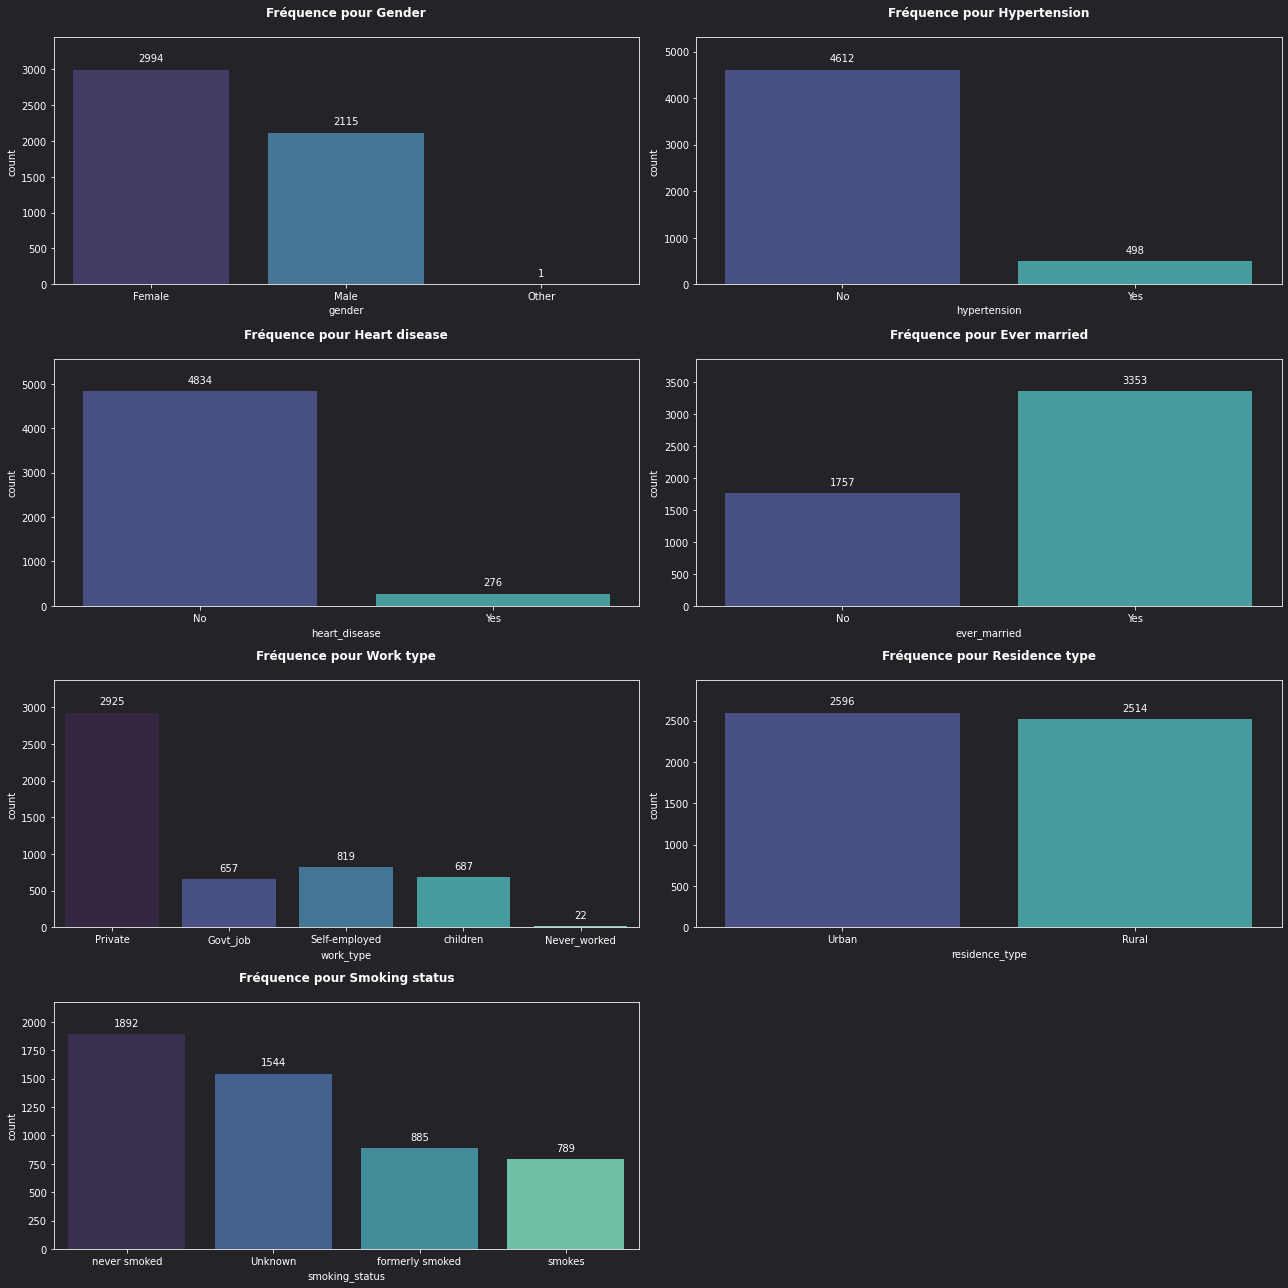

In [11]:
# (!) - In this Dataset most of people has no hypertension and no heart desease
plt.figure(figsize=(18, 18), layout='tight')
for i, col in enumerate(categoricals) :
    hi_freq = stroke_data[col].value_counts().max()
    plt.subplot(4, 2, i+1)
    plt.title(f"Fréquence pour {col.replace('_', ' ').capitalize()}\n")
    ax = sns.countplot(data=stroke_data.sort_values(by=['hypertension', 'heart_disease', 'ever_married']), x=col, palette='mako')
    ax.bar_label(ax.containers[0], padding=6)
    plt.ylim(top=hi_freq*1.15)
plt.show()

---
### **3.** Analyse bivariée

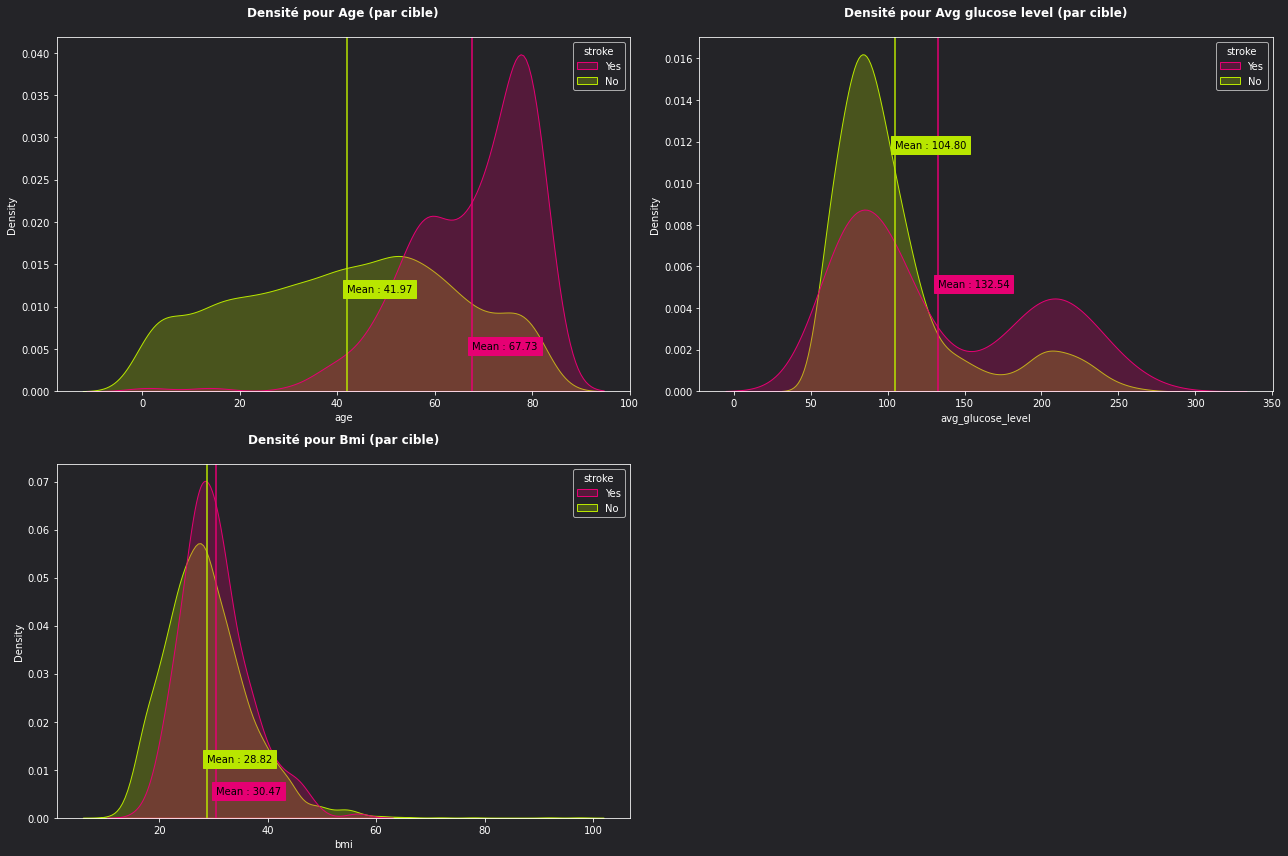

In [214]:
# (!) - Features 'bmi' and 'avg_glucose_level' are overlapping, 'age' seems more useful
stroke_catg = stroke_data['stroke'].unique()

plt.figure(figsize=(18, 12), layout='tight')
for i, col in enumerate(continous) :
    j = x = 0
    plt.subplot(2, 2, i+1)
    plt.title(f"Densité pour '{col}' par AVC\n")
    sns.kdeplot(data=stroke_data, x=col, hue='stroke', common_norm=False, fill=True, palette=stroke_c)

    for j, x in enumerate(stroke_catg) : 
        mean = stroke_data.loc[stroke_data['stroke'] == x, col].mean()
        plt.axvline(stroke_data.loc[stroke_data['stroke'] == x, col].mean(), label=f"Mean for {x}", c=stroke_c[j])
        # TODO : dynamic position of y by graphic
        plt.text(x=mean, y=0.005+(j/150), s=f"Mean : {mean:.2f}", color='black').set_backgroundcolor(color=stroke_c[j]) 
        
plt.show()

In [222]:
# (!) - Sum-up for each feature by target, 'bmi' isn't very significant
for col in continous :
    display(stroke_data[[col, 'stroke']].groupby('stroke').describe())

age                                                    
         count       mean        std   min   25%   50%   75%   max
stroke                                                            
No      4861.0  41.971545  22.291940  0.08  24.0  43.0  59.0  82.0
Yes      249.0  67.728193  12.727419  1.32  59.0  71.0  78.0  82.0

avg_glucose_level                                                       \
                   count        mean        std    min    25%     50%     75%   
stroke                                                                          
No                4861.0  104.795513  43.846069  55.12  77.12   91.47  112.83   
Yes                249.0  132.544739  61.921056  56.11  79.79  105.22  196.71   

                
           max  
stroke          
No      267.76  
Yes     271.74

bmi                                                   
         count       mean       std   min   25%   50%   75%   max
stroke                                                           
No      4700.0  28.823064  7.908287  10.3  23.4  28.0  33.1  97.6
Yes      209.0  30.471292  6.329452  16.9  26.4  29.7  33.7  56.6

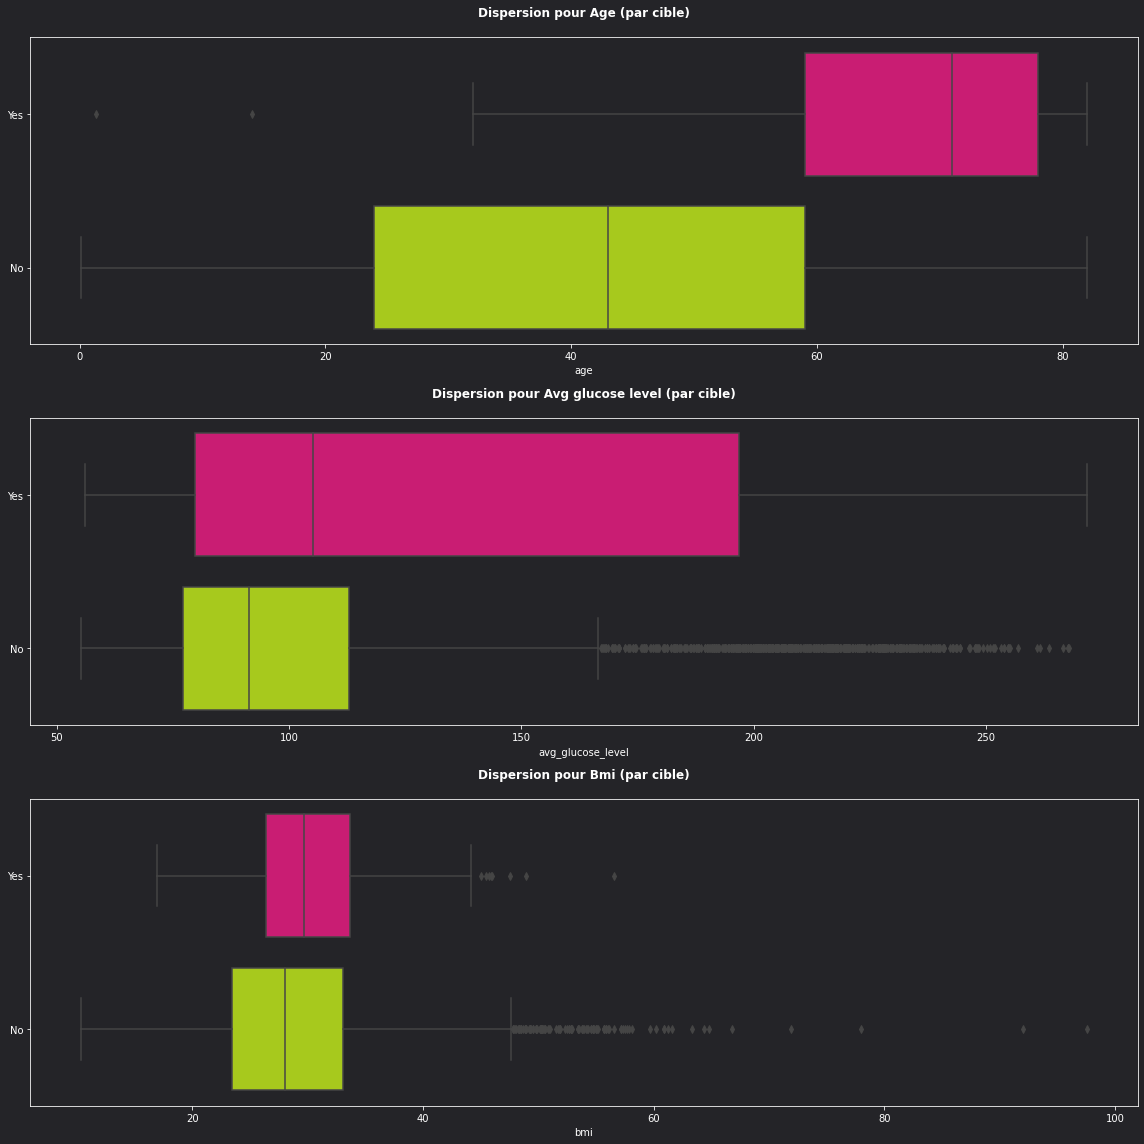

In [243]:
# (!) - Most of outliers in 'bmi' and 'avg_glucose_level' has no stroke
plt.figure(figsize=(16, 16), layout='tight')
for i, col in enumerate(continous) :
    plt.subplot(3, 1, i+1)
    plt.title(f"Dispersion pour '{col}' par AVC\n")
    sns.boxplot(data=stroke_data, x=col, y='stroke', palette=stroke_c)
    plt.ylabel('')
plt.show()

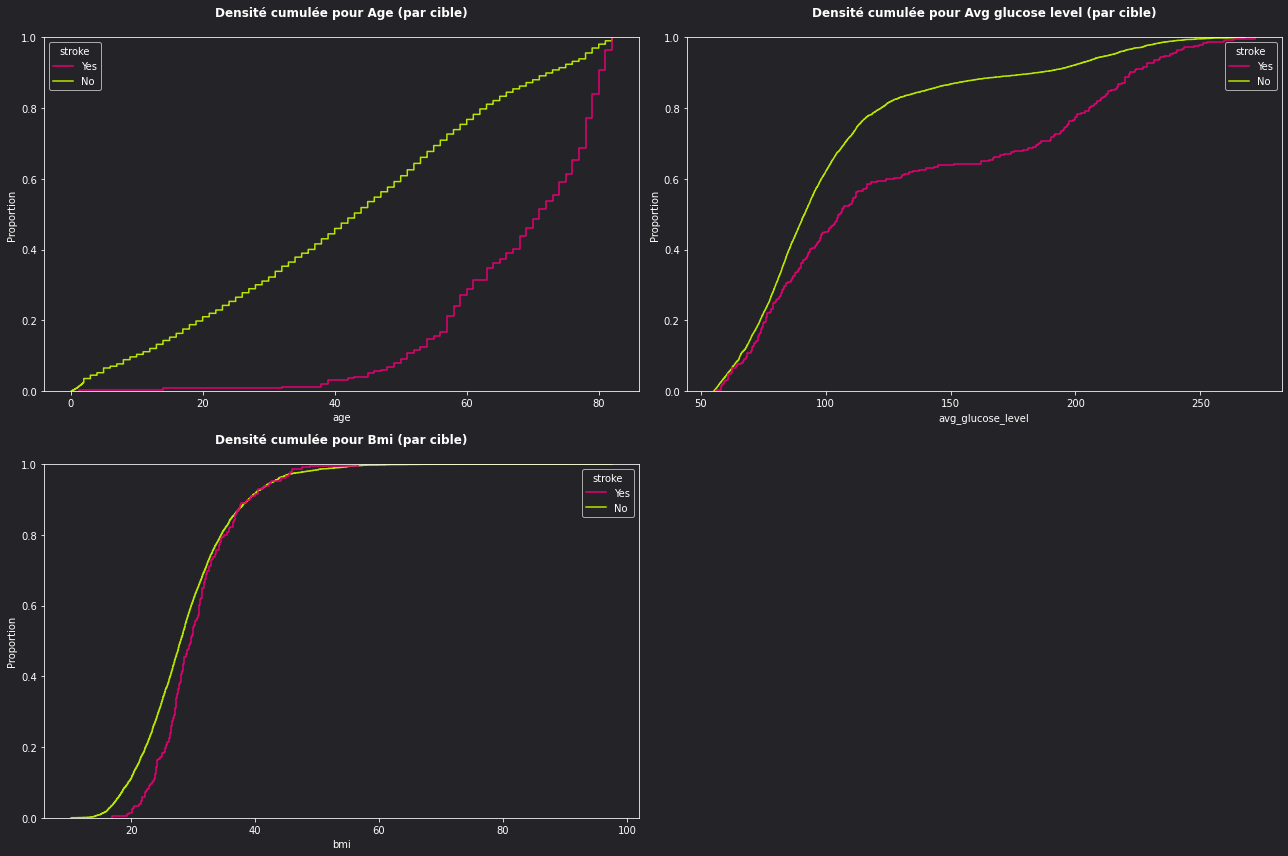

In [223]:
# (!) - Proportion of stroke changes by 'age'
plt.figure(figsize=(18, 12), layout='tight')
for i, col in enumerate(continous) :
    plt.subplot(2, 2, i+1)
    plt.title(f"Densité cumulée pour '{col}' par AVC\n")
    sns.ecdfplot(data=stroke_data, x=col, hue='stroke', palette=stroke_c)
plt.show()

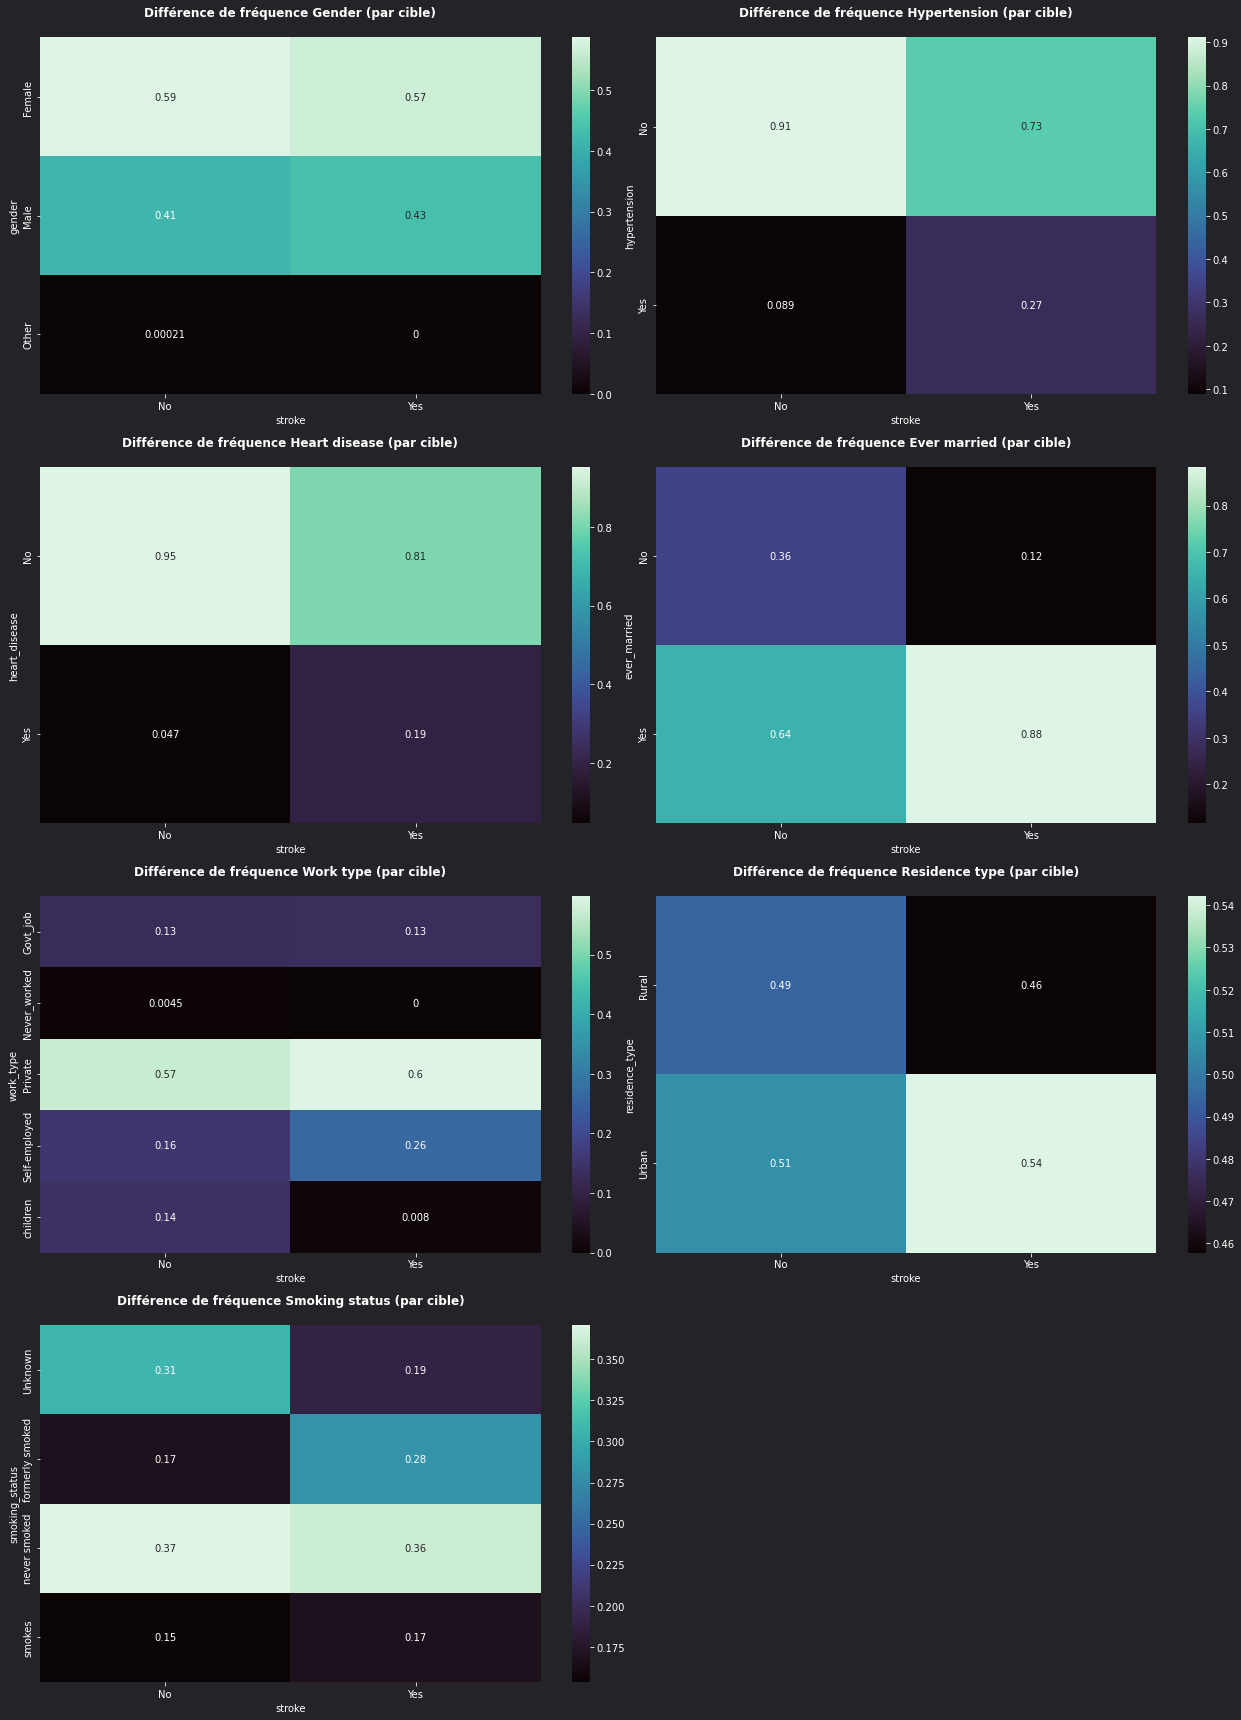

In [237]:
# (!) - No real difference by 'gender', by 'residence type', and by 'work type' (except when self-employed (?))
# (!) - Check when having 'hypertension', being 'married' (?), and being 'formerly smoked'
plt.figure(figsize=(18, 24), layout='tight')
for i, col in enumerate(categoricals) :
    cross_tab = pd.crosstab(stroke_data[col], stroke_data['stroke'], normalize='columns')
    plt.subplot(4, 2, i+1)
    plt.title(f"Différence de fréquence '{col}' par AVC\n")
    sns.heatmap(cross_tab, annot=True, cmap='mako')
plt.show()


In [238]:
# Correlation
display(stroke_data.corr(method='pearson'))
display(stroke_data.corr(method='kendall'))
stroke_data.corr(method='spearman')

,id,age,avg_glucose_level,bmi
id,1.000000,0.003538,0.001092,0.003084
age,0.003538,1.000000,0.238171,0.333398
avg_glucose_level,0.001092,0.238171,1.000000,0.175502
bmi,0.003084,0.333398,0.175502,1.000000


,id,age,avg_glucose_level,bmi
id,1.000000,0.002365,-0.035023,0.006014
age,0.002365,1.000000,0.097858,0.255237
avg_glucose_level,-0.035023,0.097858,1.000000,0.076474
bmi,0.006014,0.255237,0.076474,1.000000


,id,age,avg_glucose_level,bmi
id,1.000000,0.003741,-0.053058,0.008945
age,0.003741,1.000000,0.145168,0.375650
avg_glucose_level,-0.053058,0.145168,1.000000,0.114370
bmi,0.008945,0.375650,0.114370,1.000000
